# Pymaceuticals Inc.
---

### Analysis

In this dataset we observe 249 mice, each being treated with one of 10 pharmaceuticals. Much of the data is very similar, but there are a few that rise to the top and sink to the bottom. \
Ramicane and Capomulin result the greatest reduction in tumor size, while Ketapril has the least reduction. Likewise, Ramicane and Capomulin have the least standard deviations and therefore the least variance in results. Ketapril has the most deviations, followed closely by Naftisol. \
However, while Ramicane and Capomulin show promise over the other pharmaceuticals, it is worth noting that they were more closely monitored with the most observed timepoints, while Naftisol has the least observed timepoints.
Male and Female mice were tested virtually equally in number. \
The upper and lower quartiles of Tumor Size are 56 (mm3) and 45 (mm3) respectively, and values below 28 (mm3) and above 73 (mm3) are likely outliers. \
Plotting the 4 top performing drugs - Capomulin, Ramicane, Infubinol, and Ceftamin - we observe that Capomulin has the lowest final tumor volume, but does contain outliers, which skew the average and mean. \
Comparing results to the placebo gives an important perspective, as 6 out of 10 of the pharmaceuticals tested were comperable in tumor reduction to that of the placebo. \
There was a positive correlation between tumor volume and the weight of the rat.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(mice_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_df[mice_df[["Mouse ID", "Timepoint"]].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_df[mice_df[["Mouse ID", "Timepoint"]].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop row for Mouse ID g989
clean_mice_df = mice_df.drop(labels=[909,911,913,915,917],axis=0)
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame
#The mouse count will be the same as before since we did not delete a unique mouse's data;
#the data deleted was only duplicate data from the same mouse
#therefore the unique mouse count will stay the same, as there are still the same # of mice in the dataset
new_mouse_count = len(clean_mice_df["Mouse ID"].unique())
new_mouse_count

249

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumvol_mean = np.mean(clean_mice_df["Tumor Volume (mm3)"])
print(f"Average Tumor Volume is {tumvol_mean} mm3")
tumvol_med = np.median(clean_mice_df["Tumor Volume (mm3)"])
print(f"Median Tumor Volume is {tumvol_med} mm3")
tumvol_var = np.var(clean_mice_df["Tumor Volume (mm3)"])
print(f"Variance of Tumor Volume is {tumvol_var}")
tumvol_sd = np.std(clean_mice_df["Tumor Volume (mm3)"])
print(f"Standard Deviation of Tumor Volume is {tumvol_sd}")
tumvol_sem = st.sem(clean_mice_df["Tumor Volume (mm3)"])
print(f"SEM of Tumor Volume is {tumvol_sem}")


Average Tumor Volume is 50.44927645413136 mm3
Median Tumor Volume is 48.951421075 mm3
Variance of Tumor Volume is 79.24927995522994
Standard Deviation of Tumor Volume is 8.902206465547176
SEM of Tumor Volume is 0.2049329125626728


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
ave_vol_by_drug = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_vol_by_drug = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_by_drug = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_by_drug = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_by_drug = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


## Summary Statistics

In [10]:
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Average Tumor Size": ave_vol_by_drug,
                                "Median Tumor Volume": med_vol_by_drug,
                                "Variance of Volume": variance_by_drug,
                                "St. Dev. of Volume": sd_by_drug,
                                "St. Dev. SEM": sem_by_drug})
drug_summary_df

,Average Tumor Size,Median Tumor Volume,Variance of Volume,St. Dev. of Volume,St. Dev. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_summary_agg = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg.agg(["mean", "median","var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_list = clean_mice_df["Drug Regimen"].unique()
x_axis = clean_mice_df["Drug Regimen"].unique()
y_axis = clean_mice_df["Drug Regimen"].value_counts()


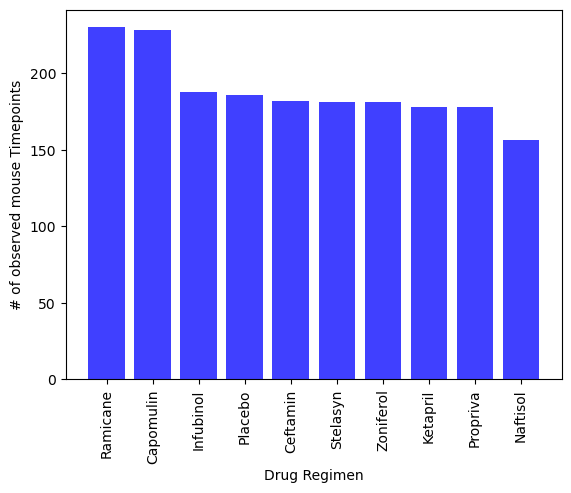

In [51]:
plt.bar(x_axis, y_axis, color="blue", alpha=0.75)
plt.xticks(drug_list, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse Timepoints")
plt.show()

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = clean_mice_df["Sex"].unique()
counts = clean_mice_df["Sex"].value_counts()
colors = ["cornflowerblue","orange"]

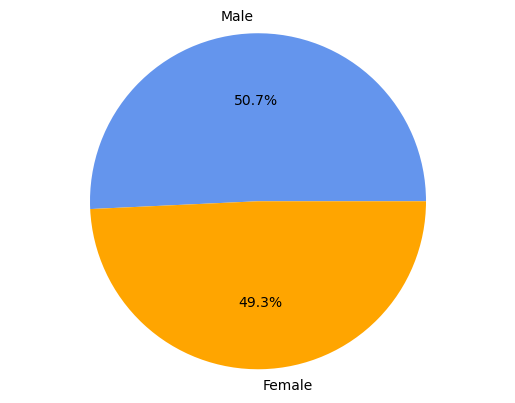

In [53]:
plt.pie(counts,labels=labels,colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_df.groupby("Mouse ID")[["Timepoint","Tumor Volume (mm3)"]].max()
#last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_mice_df,last_timepoint, on=["Mouse ID"],)
merged_df.rename(columns={'Timepoint_x': 'Timepoint',
                          'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)',
                          'Timepoint_y': 'Last Timepoint', 
                          'Tumor Volume (mm3)_y': 'Tumor Volume at Last Timepoint'},
                          inplace=True)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint,Tumor Volume at Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45,45.0


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
Capomulin_data = []
Ramicane_data = []
Infubinol_data = []
Ceftamin_data = []
Tumor_Vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
quarts = merged_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quarts[.25]
upperq = quarts[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'The lower quartile of Tumor Volumes is {lowerq} mm3')
print(f'The upper quartile of Tumor Volumes is {upperq} mm3')
print(f'The interquartile Tumor Volume is {iqr} mm3')
print(f'The median Tumor Size is {quarts[0.5]} mm3')
print(f'Values below {lower_bound} and above {upper_bound} could be outliers')

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    Tumor_Vol = merged_df.loc[merged_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    #add subset
    Capomulin_data = merged_df[merged_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
    Ramicane_data = merged_df[merged_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
    Infubinol_data = merged_df[merged_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
    Ceftamin_data = merged_df[merged_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

Drug_Tumor_df = pd.DataFrame({"Capomulin Tumor Vol": Capomulin_data,
               "Ramicane Tumor Vol": Ramicane_data,
               "Infubinol Tumor Vol": Infubinol_data,
               "Ceftamin Tumor Vol": Ceftamin_data})

The lower quartile of Tumor Volumes is 45.0 mm3
The upper quartile of Tumor Volumes is 56.32407510749999 mm3
The interquartile Tumor Volume is 11.324075107499993 mm3
The median Tumor Size is 48.951421075 mm3
Values below 28.01388733875001 and above 73.31018776874998 could be outliers


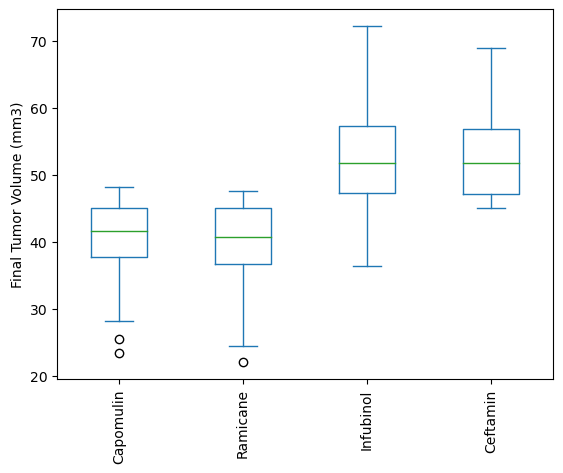

In [19]:
Drug_Tumor_df.plot(kind='box')
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], rotation="vertical")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

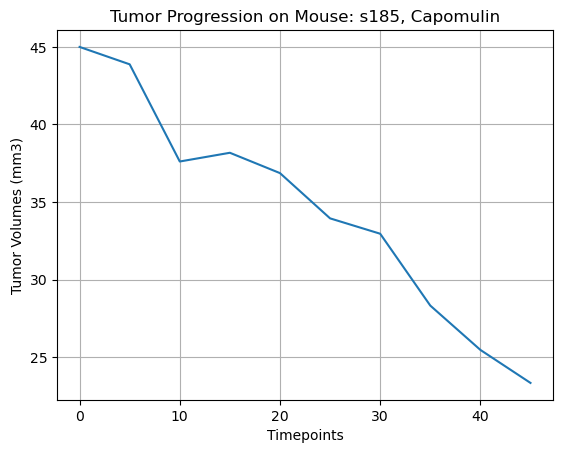

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
times = merged_df[merged_df["Mouse ID"]=="s185"]["Timepoint"]
volumes = merged_df[merged_df["Mouse ID"]=="s185"]["Tumor Volume (mm3)"]

plt.plot(times,volumes)
plt.title("Tumor Progression on Mouse: s185, Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volumes (mm3)")
plt.grid(True)
plt.show()

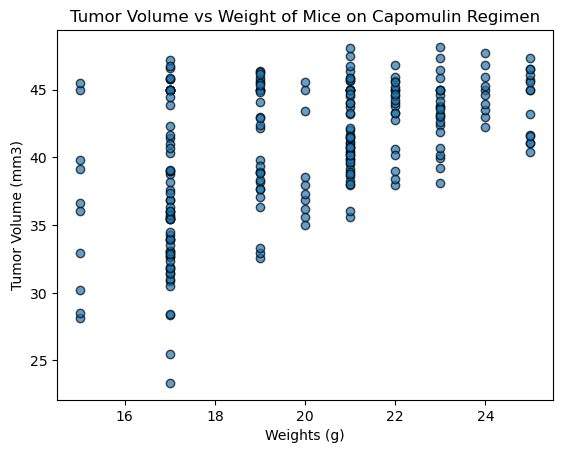

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weights = merged_df[merged_df["Drug Regimen"]=="Capomulin"]["Weight (g)"]
volumes2 = merged_df[merged_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
plt.scatter(weights,volumes2,alpha=0.7,edgecolors="black")
plt.title("Tumor Volume vs Weight of Mice on Capomulin Regimen")
plt.xlabel("Weights (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

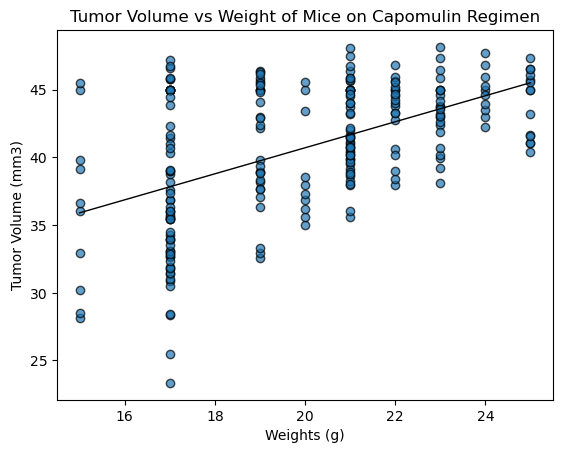

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=(weights)
y_values=(volumes2)
plt.scatter(weights,volumes2,alpha=0.7,edgecolors="black")
b, a = np.polyfit(x_values,y_values, deg=1)
xseq = np.linspace(15,25)
plt.plot(xseq, a + b * xseq, color="black",linewidth=1)
plt.title("Tumor Volume vs Weight of Mice on Capomulin Regimen")
plt.xlabel("Weights (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
